In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from error_algorithms import IoU
from error_algorithms import segmentation_accuracy
from SyMBac.misc import misc_load_img
import tifffile
import matplotlib.pyplot as plt
import os
from scipy import ndimage
from PIL import Image
from interpolate import linear_interpolate

# 100x

int(np.round(np.sqrt(seg.size/(101*np.pi))))

In [6]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/100x test"
starlist100 = []
waterlist100 = []
locallist100 = []
otsulist100 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open("omnipose_SyMBac_TD_fl/100x test/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = linear_interpolate(np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif")),mask.shape,method='nearest')
    water = linear_interpolate(ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    local = linear_interpolate(ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    otsu = linear_interpolate(ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        starlist100.append(IoU(maskj,starj))
        waterlist100.append(IoU(maskj,waterj))
        locallist100.append(IoU(maskj,localj))
        otsulist100.append(IoU(maskj,otsuj))
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

c:\Users\robho\OneDrive\Desktop\Uni_Work\Year_4\project2\error_algorithms.py:153: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  equivalent_value = stats.mode(test_area)[0][0]


In [10]:
star100 = []
water100 = []
local100 = []
otsu100 = []
for out in starlist100:
    for a,b in out:
        star100.append(a/b)
for out in waterlist100:
    for a,b in out:
        water100.append(a/b)
for out in locallist100:
    for a,b in out:
        local100.append(a/b)
for out in otsulist100:
    for a,b in out:
        otsu100.append(a/b)

In [11]:
star100 = np.array(star100)
water100 = np.array(water100)
local100 = np.array(local100)
otsu100 = np.array(otsu100)

In [12]:
print(np.mean(star100))
print(np.mean(water100))
print(np.mean(local100))
print(np.mean(otsu100))

0.7907345888894481
0.7337564021604135
0.5198222703640487
0.27900093381134544


# 60x

In [13]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/60x test"
starlist60 = []
waterlist60 = []
locallist60 = []
otsulist60 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open("omnipose_SyMBac_TD_fl/100x test/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = linear_interpolate(np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif")),mask.shape,method='nearest')
    water = linear_interpolate(ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    local = linear_interpolate(ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    otsu = linear_interpolate(ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        starlist60.append(IoU(maskj,starj))
        waterlist60.append(IoU(maskj,waterj))
        locallist60.append(IoU(maskj,localj))
        otsulist60.append(IoU(maskj,otsuj))
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [14]:
star60 = []
water60 = []
local60 = []
otsu60 = []
for out in starlist60:
    for a,b in out:
        star60.append(a/b)
for out in waterlist60:
    for a,b in out:
        water60.append(a/b)
for out in locallist60:
    for a,b in out:
        local60.append(a/b)
for out in otsulist60:
    for a,b in out:
        otsu60.append(a/b)

In [15]:
star60 = np.array(star60)
water60 = np.array(water60)
local60 = np.array(local60)
otsu60 = np.array(otsu60)

In [16]:
print(np.mean(star60))
print(np.mean(water60))
print(np.mean(local60))
print(np.mean(otsu60))

0.03620768481813948
0.027952314671114448
0.05129433362910855
0.14430985504929825


# 40x

In [17]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/40x test"
starlist40 = []
waterlist40 = []
locallist40 = []
otsulist40 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open("omnipose_SyMBac_TD_fl/100x test/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = linear_interpolate(np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif")),mask.shape,method='nearest')
    water = linear_interpolate(ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    local = linear_interpolate(ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    otsu = linear_interpolate(ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        starlist40.append(IoU(maskj,starj))
        waterlist40.append(IoU(maskj,waterj))
        locallist40.append(IoU(maskj,localj))
        otsulist40.append(IoU(maskj,otsuj))
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [18]:
star40 = []
water40 = []
local40 = []
otsu40 = []
for out in starlist40:
    for a,b in out:
        star40.append(a/b)
for out in waterlist40:
    for a,b in out:
        water40.append(a/b)
for out in locallist40:
    for a,b in out:
        local40.append(a/b)
for out in otsulist40:
    for a,b in out:
        otsu40.append(a/b)

In [19]:
star40 = np.array(star40)
water40 = np.array(water40)
local40 = np.array(local40)
otsu40 = np.array(otsu40)

In [20]:
print(np.mean(star40))
print(np.mean(water40))
print(np.mean(local40))
print(np.mean(otsu40))

0.17795802814807998
0.09603585491009912
0.10521205948021063
0.1292067066793315


# 35x

In [21]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/35x test"
starlist35 = []
waterlist35 = []
locallist35 = []
otsulist35 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open("omnipose_SyMBac_TD_fl/100x test/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = linear_interpolate(np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif")),mask.shape,method='nearest')
    water = linear_interpolate(ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    local = linear_interpolate(ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    otsu = linear_interpolate(ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        starlist35.append(IoU(maskj,starj))
        waterlist35.append(IoU(maskj,waterj))
        locallist35.append(IoU(maskj,localj))
        otsulist35.append(IoU(maskj,otsuj))
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [22]:
star35 = []
water35 = []
local35 = []
otsu35 = []
for out in starlist35:
    for a,b in out:
        star35.append(a/b)
for out in waterlist35:
    for a,b in out:
        water35.append(a/b)
for out in locallist35:
    for a,b in out:
        local35.append(a/b)
for out in otsulist35:
    for a,b in out:
        otsu35.append(a/b)

In [23]:
star35 = np.array(star35)
water35 = np.array(water35)
local35 = np.array(local35)
otsu35 = np.array(otsu35)

In [24]:
print(np.mean(star35))
print(np.mean(water35))
print(np.mean(local35))
print(np.mean(otsu35))

0.031079414268323457
0.029660255483063218
0.029664704796150354
0.032849657749867714


# 30x

In [25]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/30x test"
starlist30 = []
waterlist30 = []
locallist30 = []
otsulist30 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open("omnipose_SyMBac_TD_fl/100x test/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = linear_interpolate(np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif")),mask.shape,method='nearest')
    water = linear_interpolate(ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    local = linear_interpolate(ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    otsu = linear_interpolate(ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        starlist30.append(IoU(maskj,starj))
        waterlist30.append(IoU(maskj,waterj))
        locallist30.append(IoU(maskj,localj))
        otsulist30.append(IoU(maskj,otsuj))
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [26]:
star30 = []
water30 = []
local30 = []
otsu30 = []
for out in starlist30:
    for a,b in out:
        star30.append(a/b)
for out in waterlist30:
    for a,b in out:
        water30.append(a/b)
for out in locallist30:
    for a,b in out:
        local30.append(a/b)
for out in otsulist30:
    for a,b in out:
        otsu30.append(a/b)

In [27]:
star30 = np.array(star30)
water30 = np.array(water30)
local30 = np.array(local30)
otsu30 = np.array(otsu30)

In [28]:
print(np.mean(star30))
print(np.mean(water30))
print(np.mean(local30))
print(np.mean(otsu30))

0.029522247655697
0.02948190493791021
0.02948331735295565
0.02961485397713963


# 25x

In [29]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/25x test"
starlist25 = []
waterlist25 = []
locallist25 = []
otsulist25 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open("omnipose_SyMBac_TD_fl/100x test/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = linear_interpolate(np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif")),mask.shape,method='nearest')
    water = linear_interpolate(ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    local = linear_interpolate(ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    otsu = linear_interpolate(ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        starlist25.append(IoU(maskj,starj))
        waterlist25.append(IoU(maskj,waterj))
        locallist25.append(IoU(maskj,localj))
        otsulist25.append(IoU(maskj,otsuj))
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [30]:
star25 = []
water25 = []
local25 = []
otsu25 = []
for out in starlist25:
    for a,b in out:
        star25.append(a/b)
for out in waterlist25:
    for a,b in out:
        water25.append(a/b)
for out in locallist25:
    for a,b in out:
        local25.append(a/b)
for out in otsulist25:
    for a,b in out:
        otsu25.append(a/b)

In [31]:
star25 = np.array(star25)
water25 = np.array(water25)
local25 = np.array(local25)
otsu25 = np.array(otsu25)

In [32]:
print(np.mean(star25))
print(np.mean(water25))
print(np.mean(local25))
print(np.mean(otsu25))

0.03211921521093568
0.030207217096907126
0.030219820786084643
0.055546114854198234


# 20x

In [33]:
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/20x test"
starlist20 = []
waterlist20 = []
locallist20 = []
otsulist20 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open("omnipose_SyMBac_TD_fl/100x test/masks/test_"+str(i).zfill(5)+"_masks.png"))
    star = linear_interpolate(np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif")),mask.shape,method='nearest')
    water = linear_interpolate(ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    local = linear_interpolate(ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    otsu = linear_interpolate(ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))[0],mask.shape,method="nearest")
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        starlist20.append(IoU(maskj,starj))
        waterlist20.append(IoU(maskj,waterj))
        locallist20.append(IoU(maskj,localj))
        otsulist20.append(IoU(maskj,otsuj))
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

In [34]:
star20 = []
water20 = []
local20 = []
otsu20 = []
for out in starlist20:
    for a,b in out:
        star20.append(a/b)
for out in waterlist20:
    for a,b in out:
        water20.append(a/b)
for out in locallist20:
    for a,b in out:
        local20.append(a/b)
for out in otsulist20:
    for a,b in out:
        otsu20.append(a/b)

In [35]:
star20 = np.array(star20)
water20 = np.array(water20)
local20 = np.array(local20)
otsu20 = np.array(otsu20)

In [36]:
print(np.mean(star20))
print(np.mean(water20))
print(np.mean(local20))
print(np.mean(otsu20))

0.03004902007520937
0.029602030924758854
0.02960848000667073
0.029892635829878677


In [37]:
xx = [20,25,30,35,40,60,100]
yy1 = [np.mean(star20),np.mean(star25),np.mean(star30),
       np.mean(star35),np.mean(star40),np.mean(star60),
      np.mean(star100)]
yerr1 =[np.std(star20),np.std(star25),np.std(star30),
        np.std(star35),np.std(star40),np.std(star60),
       np.std(star100)]
yy2 = [np.mean(water20),np.mean(water25),np.mean(water30),
       np.mean(water35),np.mean(water40),np.mean(water60),
      np.mean(water100)]
yerr2 =[np.std(water20),np.std(water25),np.std(water30),
        np.std(water35),np.std(water40),np.std(water60),
       np.std(water100)]
yy3 = [np.mean(local20),np.mean(local25),np.mean(local30),
       np.mean(local35),np.mean(local40),np.mean(local60),
      np.mean(local100)]
yerr3 =[np.std(local20),np.std(local25),np.std(local30),
        np.std(local35),np.std(local40),np.std(local60),
       np.std(local100)]
yy4 = [np.mean(otsu20),np.mean(otsu25),np.mean(otsu30),
       np.mean(otsu35),np.mean(otsu40),np.mean(otsu60),
      np.mean(otsu100)]
yerr4 =[np.std(otsu20),np.std(otsu25),np.std(otsu30),
        np.std(otsu35),np.std(otsu40),np.std(otsu60),
       np.std(otsu100)]
yy5 = [0.5492873852368559, 0.8098346080844339, 0.8747788945422776, 0.881359675317439, 0.9076305971849199, 0.9376935549320867, 0.9563233811865741]
yerr5 = [0.28625493952177417, 0.1514439261406357, 0.12479522586979702, 0.11420689269020612, 0.12381686118780141, 0.10647715688246623, 0.07271896570044278]


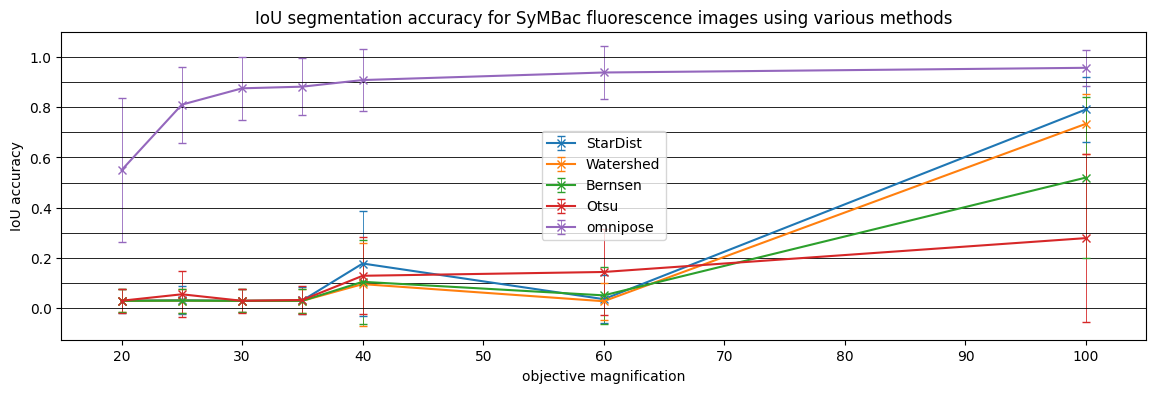

In [38]:
plt.rcParams["figure.figsize"] = [14,4]
plt.plot([15,105],[1,1],color='black',linewidth=0.6)
plt.plot([15,105],[0.8,0.8],color='black',linewidth=0.6)
plt.plot([15,105],[0.6,0.6],color='black',linewidth=0.6)
plt.plot([15,105],[0.4,0.4],color='black',linewidth=0.6)
plt.plot([15,105],[0.2,0.2],color='black',linewidth=0.6)
plt.plot([15,105],[0.9,0.9],color='black',linewidth=0.6)
plt.plot([15,105],[0.7,0.7],color='black',linewidth=0.6)
plt.plot([15,105],[0.5,0.5],color='black',linewidth=0.6)
plt.plot([15,105],[0.3,0.3],color='black',linewidth=0.6)
plt.plot([15,105],[0.1,0.1],color='black',linewidth=0.6)
plt.plot([15,105],[0,0],color='black',linewidth=0.6)
plt.errorbar(xx,yy1,yerr1,elinewidth=0.6,capsize=3,marker='x',label='StarDist')
plt.errorbar(xx,yy2,yerr2,elinewidth=0.6,capsize=3,marker='x',label='Watershed')
plt.errorbar(xx,yy3,yerr3,elinewidth=0.6,capsize=3,marker='x',label='Bernsen')
plt.errorbar(xx,yy4,yerr4,elinewidth=0.6,capsize=3,marker='x',label='Otsu')
plt.errorbar(xx,yy5,yerr5,elinewidth=0.6,capsize=3,marker='x',label='omnipose')
plt.title("IoU segmentation accuracy for SyMBac fluorescence images using various methods")
plt.xlabel("objective magnification")
plt.ylabel("IoU accuracy")
plt.xlim(15,105)
# plt.ylim(0.4,1.1)
plt.legend()
plt.show()

# divide stdev by sqrt(400-1) for error bars

In [57]:
from error_algorithms import centroid_distances
from error_algorithms import find_cell_info
from error_algorithms import ignore_duplicates
from scipy.spatial.distance import cdist

In [85]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/100x test"
maskid100 = []
omniid100 = []
starid100 = []
waterid100 = []
localid100 = []
otsuid100 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid100.append(maskj)
        omniid100.append(omnij)
        starid100.append(starj)
        waterid100.append(waterj)
        localid100.append(localj)
        otsuid100.append(otsuj)
    # idlist.append(segmentation_accuracy(mask,[star,water,local,otsu],min_dist=mask.shape[1]//5,lb=0.5,ub=1/0.5))

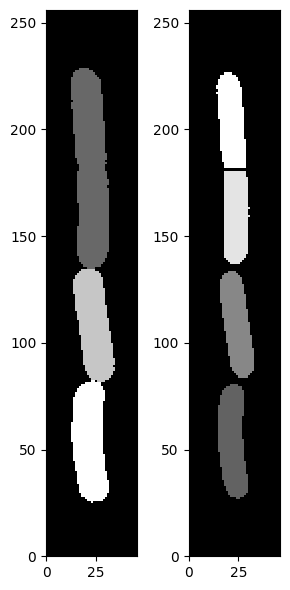

In [86]:
fig, axs = plt.subplots(1,2,figsize=(3,6))
axs[0].pcolor(maskid100[0],cmap="Greys_r")
axs[1].pcolor(waterid100[0],cmap="Greys_r")
fig.tight_layout()
plt.show()

In [87]:
star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid100):
    star_nearest, star_dist = centroid_distances(mask,starid100[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid100[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid100[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid100[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid100[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)
# star_nearests = np.concatenate(star_nearests,axis=0)
# star_dists = np.hstack(star_dists)
# omni_nearests = np.concatenate(omni_nearests,axis=0)
# omni_dists = np.hstack(omni_dists)
# water_nearests = np.concatenate(water_nearests,axis=0)
# water_dists = np.hstack(water_dists)
# local_nearests = np.concatenate(local_nearests,axis=0)
# local_dists = np.hstack(local_dists)
# otsu_nearests = np.concatenate(otsu_nearests,axis=0)
# otsu_dists = np.hstack(otsu_dists)

In [88]:
star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

In [89]:
star_distances100 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances100 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances100 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances100 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances100 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

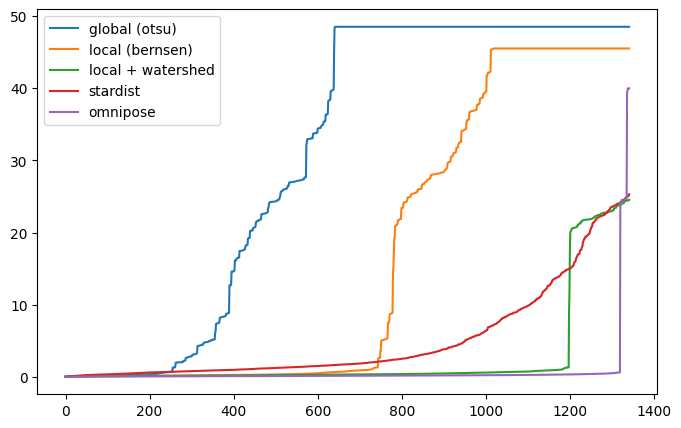

In [90]:
plt.rcParams["figure.figsize"] = [8,5]
plt.plot(np.sort(otsu_distances100),label="global (otsu)")
plt.plot(np.sort(local_distances100),label="local (bernsen)")
plt.plot(np.sort(water_distances100),label="local + watershed")
plt.plot(np.sort(star_distances100),label="stardist")
plt.plot(np.sort(omni_distances100),label="omnipose")
plt.legend()
plt.show()

In [91]:
# fig, axs = plt.subplots(len(omni_indices),3,figsize=(6,65))
# for i, ind in enumerate(omni_indices):
#     thing1 = axs[i,0].pcolor(maskid100[ind][::-1],cmap="Greys_r")
#     thing2 = axs[i,1].pcolor(omniid100[ind][::-1],cmap="Greys_r")
#     thing3 = axs[i,2].pcolor((maskid100[ind] * omniid100[ind])[::-1],cmap="Greys_r")
#     plt.colorbar(thing1,ax=axs[i,0])
#     plt.colorbar(thing2,ax=axs[i,1])
#     plt.colorbar(thing3,ax=axs[i,2])
# fig.tight_layout()
# plt.show()

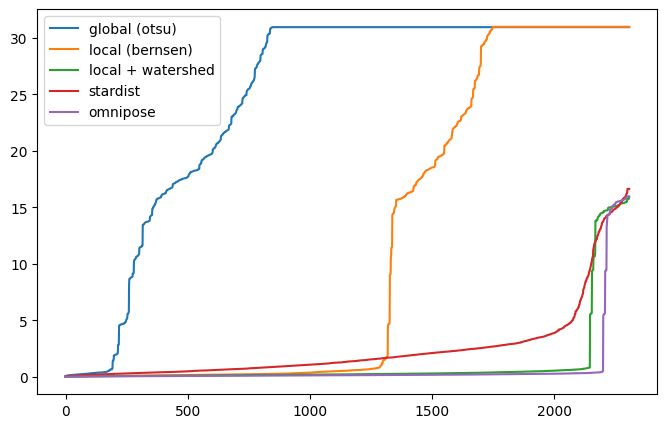

In [92]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/60x test"
maskid60 = []
omniid60 = []
starid60 = []
waterid60 = []
localid60 = []
otsuid60 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid60.append(maskj)
        omniid60.append(omnij)
        starid60.append(starj)
        waterid60.append(waterj)
        localid60.append(localj)
        otsuid60.append(otsuj)

star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid60):
    star_nearest, star_dist = centroid_distances(mask,starid60[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid60[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid60[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid60[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid60[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)

star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

star_distances60 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances60 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances60 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances60 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances60 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

plt.plot(np.sort(otsu_distances60),label="global (otsu)")
plt.plot(np.sort(local_distances60),label="local (bernsen)")
plt.plot(np.sort(water_distances60),label="local + watershed")
plt.plot(np.sort(star_distances60),label="stardist")
plt.plot(np.sort(omni_distances60),label="omnipose")
plt.legend()
plt.show()

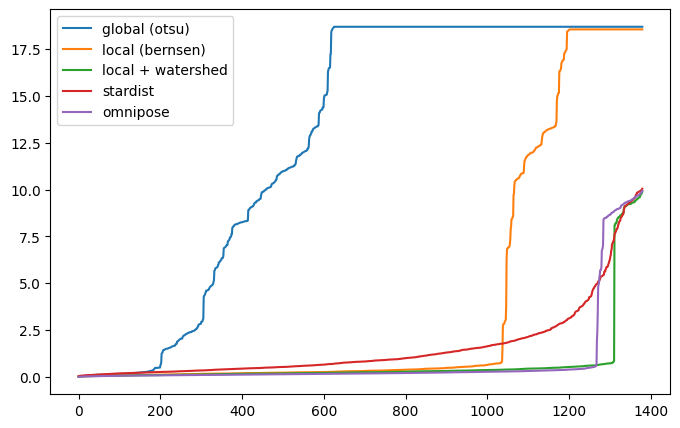

In [93]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/40x test"
maskid40 = []
omniid40 = []
starid40 = []
waterid40 = []
localid40 = []
otsuid40 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid40.append(maskj)
        omniid40.append(omnij)
        starid40.append(starj)
        waterid40.append(waterj)
        localid40.append(localj)
        otsuid40.append(otsuj)

star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid40):
    star_nearest, star_dist = centroid_distances(mask,starid40[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid40[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid40[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid40[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid40[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)

star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

star_distances40 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances40 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances40 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances40 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances40 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

plt.plot(np.sort(otsu_distances40),label="global (otsu)")
plt.plot(np.sort(local_distances40),label="local (bernsen)")
plt.plot(np.sort(water_distances40),label="local + watershed")
plt.plot(np.sort(star_distances40),label="stardist")
plt.plot(np.sort(omni_distances40),label="omnipose")
plt.legend()
plt.show()

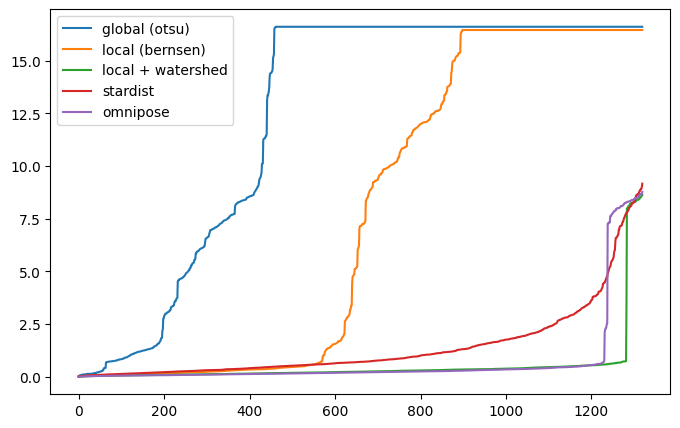

In [94]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/35x test"
maskid35 = []
omniid35 = []
starid35 = []
waterid35 = []
localid35 = []
otsuid35 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid35.append(maskj)
        omniid35.append(omnij)
        starid35.append(starj)
        waterid35.append(waterj)
        localid35.append(localj)
        otsuid35.append(otsuj)

star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid35):
    star_nearest, star_dist = centroid_distances(mask,starid35[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid35[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid35[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid35[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid35[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)

star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

star_distances35 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances35 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances35 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances35 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances35 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

plt.plot(np.sort(otsu_distances35),label="global (otsu)")
plt.plot(np.sort(local_distances35),label="local (bernsen)")
plt.plot(np.sort(water_distances35),label="local + watershed")
plt.plot(np.sort(star_distances35),label="stardist")
plt.plot(np.sort(omni_distances35),label="omnipose")
plt.legend()
plt.show()

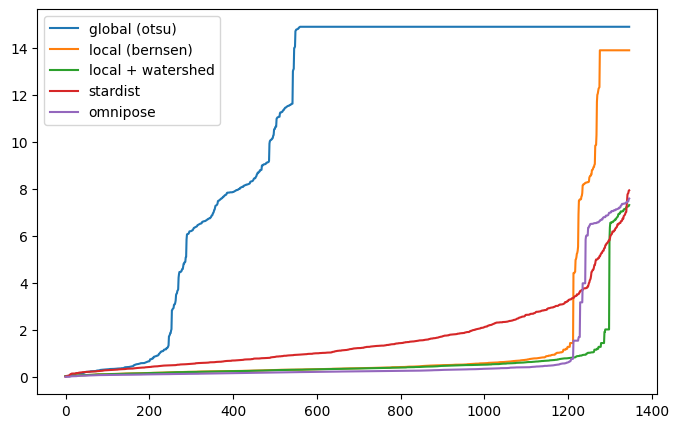

In [95]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/30x test"
maskid30 = []
omniid30 = []
starid30 = []
waterid30 = []
localid30 = []
otsuid30 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid30.append(maskj)
        omniid30.append(omnij)
        starid30.append(starj)
        waterid30.append(waterj)
        localid30.append(localj)
        otsuid30.append(otsuj)

star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid30):
    star_nearest, star_dist = centroid_distances(mask,starid30[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid30[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid30[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid30[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid30[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)

star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

star_distances30 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances30 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances30 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances30 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances30 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

plt.plot(np.sort(otsu_distances30),label="global (otsu)")
plt.plot(np.sort(local_distances30),label="local (bernsen)")
plt.plot(np.sort(water_distances30),label="local + watershed")
plt.plot(np.sort(star_distances30),label="stardist")
plt.plot(np.sort(omni_distances30),label="omnipose")
plt.legend()
plt.show()

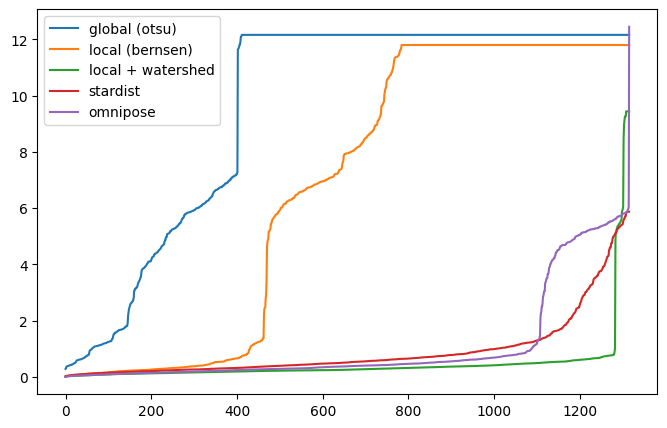

In [96]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/25x test"
maskid25 = []
omniid25 = []
starid25 = []
waterid25 = []
localid25 = []
otsuid25 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid25.append(maskj)
        omniid25.append(omnij)
        starid25.append(starj)
        waterid25.append(waterj)
        localid25.append(localj)
        otsuid25.append(otsuj)

star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid25):
    star_nearest, star_dist = centroid_distances(mask,starid25[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid25[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid25[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid25[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid25[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)

star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

star_distances25 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances25 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances25 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances25 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances25 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

plt.plot(np.sort(otsu_distances25),label="global (otsu)")
plt.plot(np.sort(local_distances25),label="local (bernsen)")
plt.plot(np.sort(water_distances25),label="local + watershed")
plt.plot(np.sort(star_distances25),label="stardist")
plt.plot(np.sort(omni_distances25),label="omnipose")
plt.legend()
plt.show()

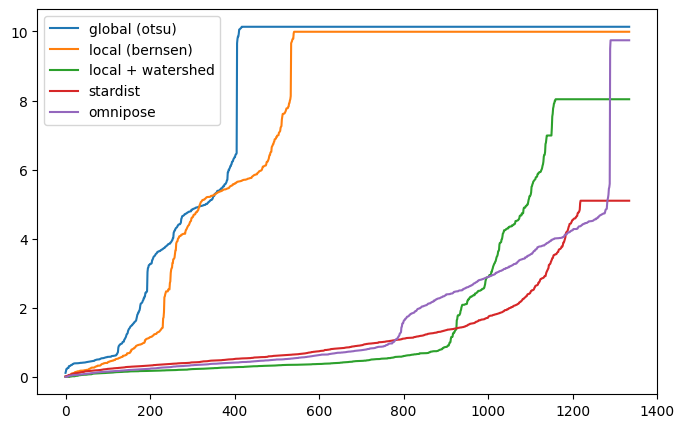

In [97]:
# type: ignore
directory = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/omnipose_SyMBac_TD_fl/20x test"
maskid20 = []
omniid20 = []
starid20 = []
waterid20 = []
localid20 = []
otsuid20 = []
for i in range(len(os.listdir(directory+"/masks"))):
    mask = np.array(Image.open(directory+"/masks/test_"+str(i).zfill(5)+"_masks.png"))
    omni = np.array(Image.open(directory+"/omnipose segmentations/mask_"+str(i).zfill(5)+".png"))
    star = np.array(Image.open(directory+"/stardist/test_"+str(i).zfill(5)+"StarDist.tif"))
    water,_ = ndimage.label(tifffile.imread(directory+"/watershed/test_"+str(i).zfill(5)+"watershed.tif"),np.ones([3,3]))
    local,_ = ndimage.label(tifffile.imread(directory+"/bernsen/test_"+str(i).zfill(5)+"bernsen.tif"),np.ones([3,3]))
    otsu,_ = ndimage.label(tifffile.imread(directory+"/otsu/test_"+str(i).zfill(5)+"otsu.tif"),np.ones([3,3]))
    width = mask.shape[1]//40
    height = mask.shape[0]
    for j in range(40):
        maskj = mask[:,width*j:width*(j+1)]
        omnij = omni[:,width*j:width*(j+1)]
        starj = star[:,width*j:width*(j+1)]
        waterj = water[:,width*j:width*(j+1)]
        localj = local[:,width*j:width*(j+1)]
        otsuj = otsu[:,width*j:width*(j+1)]
        maskid20.append(maskj)
        omniid20.append(omnij)
        starid20.append(starj)
        waterid20.append(waterj)
        localid20.append(localj)
        otsuid20.append(otsuj)

star_nearests, star_dists = [], []
omni_nearests, omni_dists = [], []
water_nearests, water_dists = [], []
local_nearests, local_dists = [], []
otsu_nearests, otsu_dists = [], []
for i, mask in enumerate(maskid20):
    star_nearest, star_dist = centroid_distances(mask,starid20[i])
    star_nearests.append(star_nearest)
    star_dists.append(star_dist)
    omni_nearest, omni_dist = centroid_distances(mask,omniid20[i])
    omni_nearests.append(omni_nearest)
    omni_dists.append(omni_dist)
    water_nearest, water_dist = centroid_distances(mask,waterid20[i])
    water_nearests.append(water_nearest)
    water_dists.append(water_dist)
    local_nearest, local_dist = centroid_distances(mask,localid20[i])
    local_nearests.append(local_nearest)
    local_dists.append(local_dist)
    otsu_nearest, otsu_dist = centroid_distances(mask,otsuid20[i])
    otsu_nearests.append(otsu_nearest)
    otsu_dists.append(otsu_dist)

star_cells, star_dist, star_duplicates, star_indices = ignore_duplicates(star_nearests, star_dists)
omni_cells, omni_dist, omni_duplicates, omni_indices = ignore_duplicates(omni_nearests, omni_dists)
water_cells, water_dist, water_duplicates, water_indices = ignore_duplicates(water_nearests, water_dists)
local_cells, local_dist, local_duplicates, local_indices = ignore_duplicates(local_nearests, local_dists)
otsu_cells, otsu_dist, otsu_duplicates, otsu_indices = ignore_duplicates(otsu_nearests, otsu_dists)

star_distances20 = np.append(star_dist, [np.max(star_dist)]*star_duplicates)
omni_distances20 = np.append(omni_dist, [np.max(omni_dist)]*omni_duplicates)
water_distances20 = np.append(water_dist, [np.max(water_dist)]*water_duplicates)
local_distances20 = np.append(local_dist, [np.max(local_dist)]*local_duplicates)
otsu_distances20 = np.append(otsu_dist, [np.max(otsu_dist)]*otsu_duplicates)

plt.plot(np.sort(otsu_distances20),label="global (otsu)")
plt.plot(np.sort(local_distances20),label="local (bernsen)")
plt.plot(np.sort(water_distances20),label="local + watershed")
plt.plot(np.sort(star_distances20),label="stardist")
plt.plot(np.sort(omni_distances20),label="omnipose")
plt.legend()
plt.show()

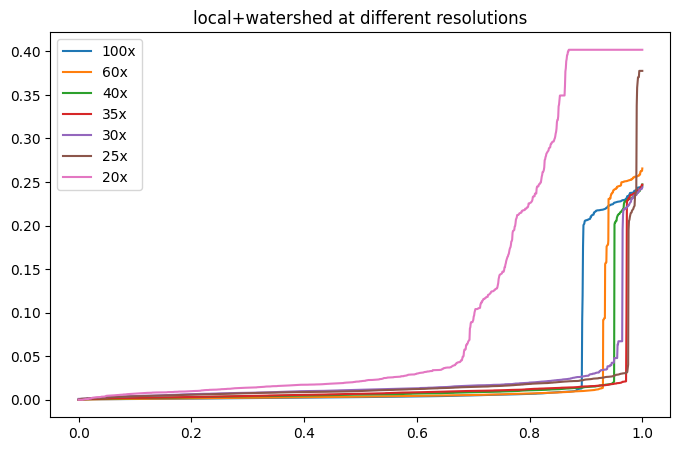

In [104]:
plt.plot(np.linspace(0,1,len(water_distances100)),np.sort(water_distances100)/100,label="100x")
plt.plot(np.linspace(0,1,len(water_distances60)),np.sort(water_distances60)/60,label="60x")
plt.plot(np.linspace(0,1,len(water_distances40)),np.sort(water_distances40)/40,label="40x")
plt.plot(np.linspace(0,1,len(water_distances35)),np.sort(water_distances35)/35,label="35x")
plt.plot(np.linspace(0,1,len(water_distances30)),np.sort(water_distances30)/30,label="30x")
plt.plot(np.linspace(0,1,len(water_distances25)),np.sort(water_distances25)/25,label="25x")
plt.plot(np.linspace(0,1,len(water_distances20)),np.sort(water_distances20)/20,label="20x")
plt.title("local+watershed at different resolutions")
plt.legend()
plt.show()

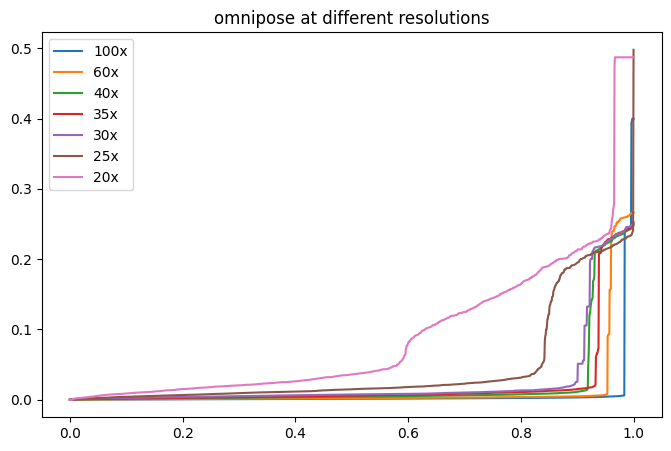

In [102]:
plt.plot(np.linspace(0,1,len(omni_distances100)),np.sort(omni_distances100)/100,label="100x")
plt.plot(np.linspace(0,1,len(omni_distances60)), np.sort(omni_distances60)/60,label="60x")
plt.plot(np.linspace(0,1,len(omni_distances40)), np.sort(omni_distances40)/40,label="40x")
plt.plot(np.linspace(0,1,len(omni_distances35)), np.sort(omni_distances35)/35,label="35x")
plt.plot(np.linspace(0,1,len(omni_distances30)), np.sort(omni_distances30)/30,label="30x")
plt.plot(np.linspace(0,1,len(omni_distances25)), np.sort(omni_distances25)/25,label="25x")
plt.plot(np.linspace(0,1,len(omni_distances20)), np.sort(omni_distances20)/20,label="20x")
plt.title("omnipose at different resolutions")
plt.legend()
plt.show()

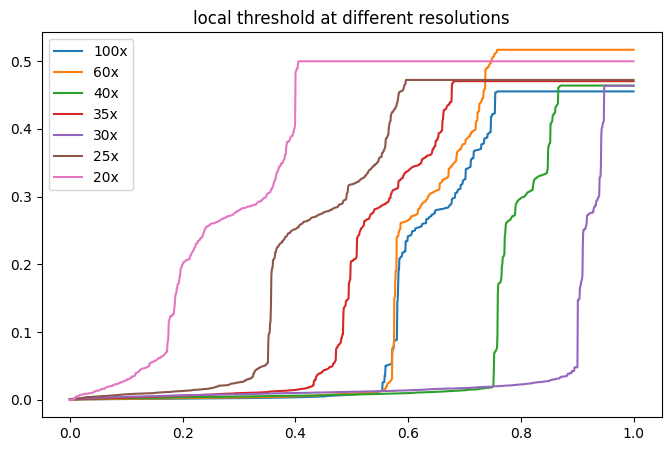

In [103]:
plt.plot(np.linspace(0,1,len(local_distances100)),np.sort(local_distances100)/100,label="100x")
plt.plot(np.linspace(0,1,len(local_distances60)), np.sort(local_distances60)/60,label="60x")
plt.plot(np.linspace(0,1,len(local_distances40)), np.sort(local_distances40)/40,label="40x")
plt.plot(np.linspace(0,1,len(local_distances35)), np.sort(local_distances35)/35,label="35x")
plt.plot(np.linspace(0,1,len(local_distances30)), np.sort(local_distances30)/30,label="30x")
plt.plot(np.linspace(0,1,len(local_distances25)), np.sort(local_distances25)/25,label="25x")
plt.plot(np.linspace(0,1,len(local_distances20)), np.sort(local_distances20)/20,label="20x")
plt.title("local threshold at different resolutions")
plt.legend()
plt.show()

In [ ]:
# ensure it only carries from same trench

In [83]:
grounds = [[[50,25],[125,25],[200,25]],[[48,23],[100,27],[151,26],[203,24]],[[49,26],[125,24],[199,25]]]
guesses = [[[51,26],[126,24],[199,26]],[[74,24],[150,26],[204,24]],[[50,25],[124,24],[200,25]]]
nears, dists = [],[]
for ground, guess in zip(grounds, guesses):
    dist = cdist(ground, guess)
    nears.append(np.array(guess)[np.argmin(dist,axis=-1)])
    dists.append(np.min(dist,axis=-1))
cells, distances, num_duplicates, indices = ignore_duplicates(nears, dists)

In [84]:
cells, distances, num_duplicates, indices

(array([[ 51,  26],
        [126,  24],
        [199,  26],
        [ 74,  24],
        [150,  26],
        [204,  24],
        [ 50,  25],
        [124,  24],
        [200,  25]]),
 array([ 1.41421356,  1.41421356,  1.41421356, 26.01922366,  1.        ,
         1.        ,  1.41421356,  1.        ,  1.        ]),
 1,
 [1])